In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
try:
    df = pd.read_csv('diabetes.csv')
    print("Dataset loaded successfully!")
    print(df.head())
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please download the Pima Indians Diabetes Database and place it in the same directory.")
    exit()

Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset shape: (768, 9)


In [3]:
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zero:
    df[col] = df[col].replace(0, np.nan)

In [4]:
for col in cols_to_replace_zero:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_10332\129203714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [9]:
print("\nData Preprocessing and Normalization Complete.")
print("Sample of scaled data:")
print(X_train_scaled_df.head())


Data Preprocessing and Normalization Complete.
Sample of scaled data:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
751    -0.855471 -0.020350       0.484747       1.119730 -0.996773  0.954364   
358     2.467805 -1.116897       0.158245       1.233130 -1.253598  0.405049   
718    -0.855471 -0.452323      -0.984509       1.913528  0.338718  0.434741   
536    -1.157587 -0.552009       1.464250       0.003131  0.050409 -0.441194   
651    -0.855471 -0.153264      -0.984509      -0.694665 -0.585853  0.182353   

     DiabetesPedigreeFunction       Age  
751                 -0.658457 -0.466486  
358                 -0.306999  1.218656  
718                 -0.195854 -0.803514  
536                 -0.850708  1.050142  
651                 -0.042655 -0.550743  


In [10]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest Classifier': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

In [11]:
results = {}


Training and Evaluating Models:

--- Logistic Regression ---
Accuracy: 0.7292
ROC AUC Score: 0.8223
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192


Feature Importances (Coefficients) for Logistic Regression:
                     feature  importance
1                   Glucose    1.145236
5                       BMI    0.716873
0               Pregnancies    0.437138
6  DiabetesPedigreeFunction    0.208674
7                       Age    0.126146
3             SkinThickness    0.060138
2             BloodPressure    0.054803
4                   Insulin    0.007986


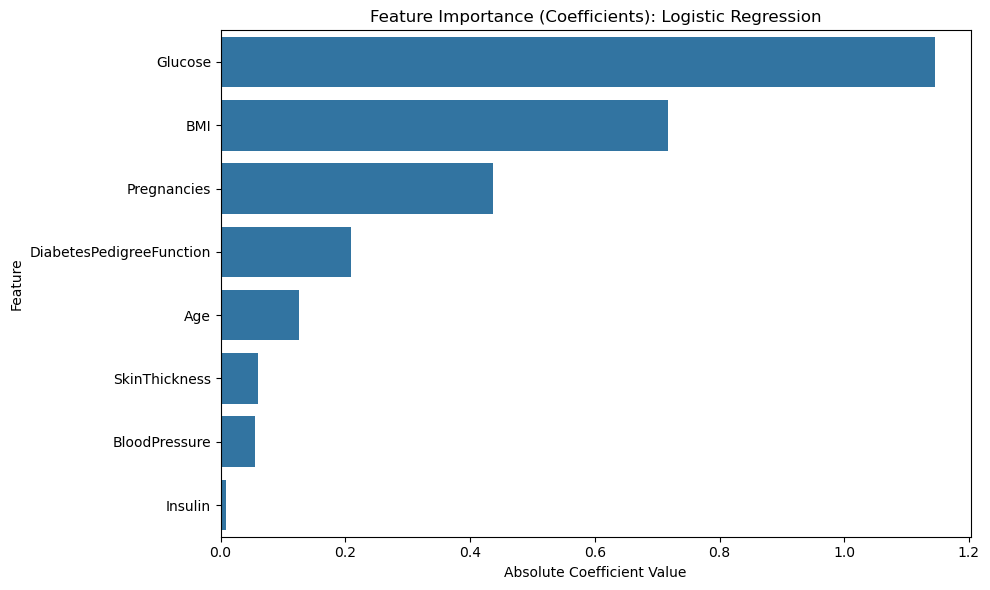


--- Random Forest Classifier ---
Accuracy: 0.7344
ROC AUC Score: 0.8131
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.54      0.59        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192


Feature Importances for Random Forest Classifier:
                     feature  importance
1                   Glucose    0.272701
5                       BMI    0.164277
6  DiabetesPedigreeFunction    0.121924
7                       Age    0.119485
4                   Insulin    0.086983
0               Pregnancies    0.083307
2             BloodPressure    0.081443
3             SkinThickness    0.069879


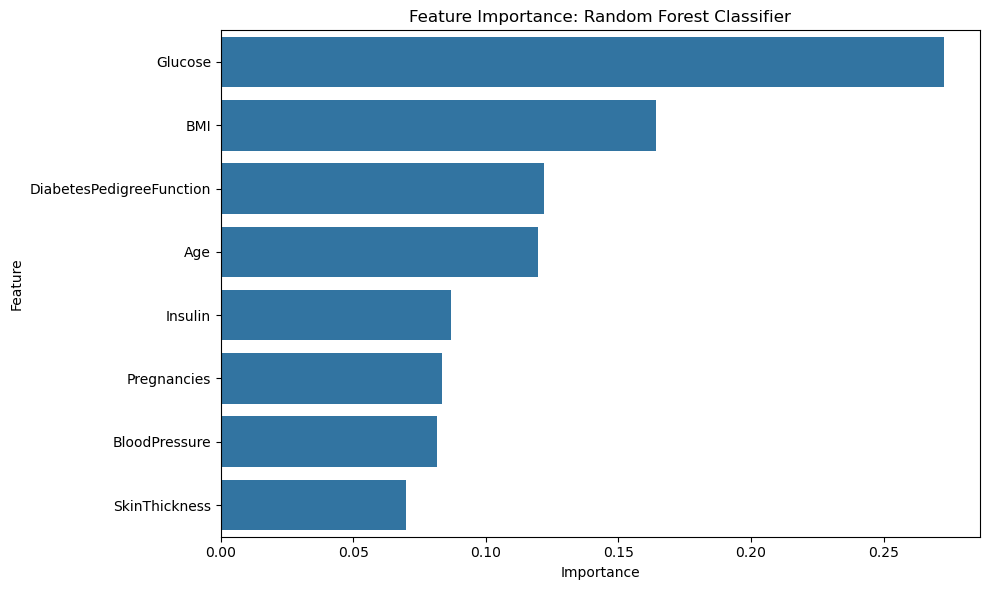


--- Gradient Boosting Classifier ---
Accuracy: 0.7448
ROC AUC Score: 0.8207
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.66      0.57      0.61        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192


Feature Importances for Gradient Boosting Classifier:
                     feature  importance
1                   Glucose    0.418268
5                       BMI    0.166580
7                       Age    0.117544
6  DiabetesPedigreeFunction    0.100839
4                   Insulin    0.085413
0               Pregnancies    0.057628
2             BloodPressure    0.030313
3             SkinThickness    0.023414


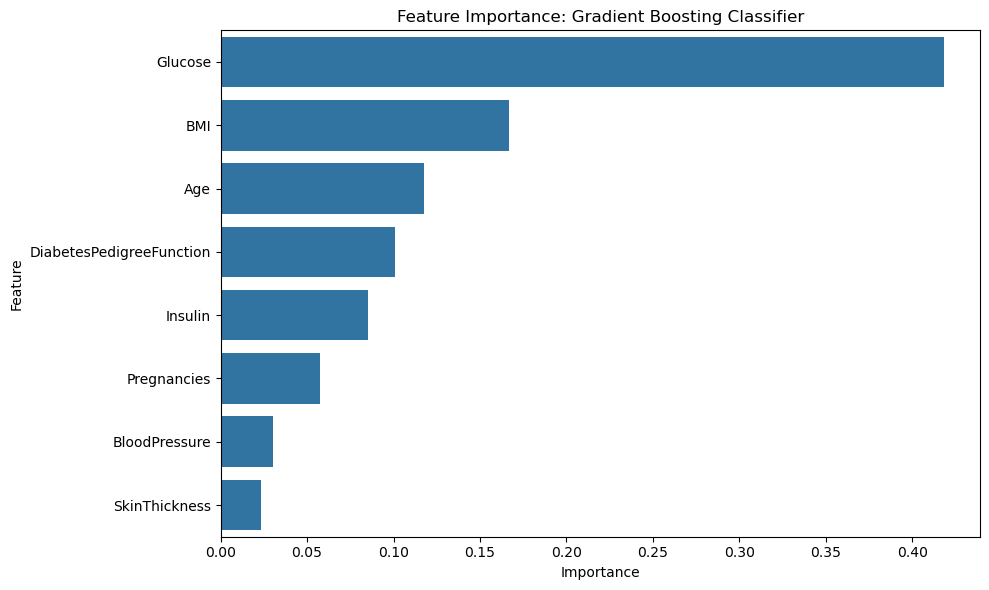

In [12]:
print("\nTraining and Evaluating Models:")
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_test_scaled_df)
    y_proba = model.predict_proba(X_test_scaled_df)[:, 1] # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'report': report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:\n", report)

    # Feature Importance Analysis
    if hasattr(model, 'feature_importances_'): # For tree-based models
        importances = model.feature_importances_
        feature_names = X.columns
        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
        print(f"\nFeature Importances for {name}:\n", feature_importance_df)

        # Plotting feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance_df)
        plt.title(f'Feature Importance: {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        

    elif hasattr(model, 'coef_'): # For linear models like Logistic Regression
        # For Logistic Regression, coefficients represent feature importance.
        # Absolute value is used as negative coefficients also indicate importance.
        importances = np.abs(model.coef_[0])
        feature_names = X.columns
        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
        print(f"\nFeature Importances (Coefficients) for {name}:\n", feature_importance_df)

        # Plotting feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance_df)
        plt.title(f'Feature Importance (Coefficients): {name}')
        plt.xlabel('Absolute Coefficient Value')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        

    else: # For other models, use permutation importance
        print(f"\nCalculating Permutation Importance for {name} (can be slow for large datasets):")
        result = permutation_importance(model, X_test_scaled_df, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        sorted_idx = result.importances_mean.argsort()[::-1]
        feature_importance_df = pd.DataFrame({
            'feature': X.columns[sorted_idx],
            'importance_mean': result.importances_mean[sorted_idx],
            'importance_std': result.importances_std[sorted_idx]
        })
        print(f"\nPermutation Importance for {name}:\n", feature_importance_df)

        # Plotting permutation importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance_mean', y='feature', data=feature_importance_df)
        plt.title(f'Permutation Importance: {name}')
        plt.xlabel('Mean Decrease in Accuracy')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        